In [1]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

In [20]:
n_epochs = 10000
learning_rate = 0.01
log_interval = 20

#set random seed
random_seed = 1
torch.manual_seed(random_seed)

#set torch device
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")

In [21]:
from dataloader import get_dataloaders

batch_size_train = 1000
batch_size_test = 200
'''
downsample mnist so we can run longer.
set batch sizes = total dataset sizes so we don't need to modify test loop for f1/prec/recall 

'''
train_loader, test_loader = get_dataloaders(batch_size_train, batch_size_test, batch_size_train,
                                            batch_size_test)

### Running SG vs BP

In [ ]:
from models import (Four_Layer, Eight_Layer, VGG16_custom, Four_Layer_SG, Eight_Layer_SG, VGG16_SG)
import numpy as np
from train import train,train_sg,test 
import warnings
warnings.filterwarnings("ignore")

# train_counter = []
# test_counter = [i * len(train_loader.dataset) for i in range(n_epochs + 1)]
history = {}

model_dict = {
    'Four_layer': Four_Layer,
    'Eight_Layer': Eight_Layer,
    'VGG16': VGG16_custom,
    'Four_Layer_SG': Four_Layer_SG,
    'Eight_Layer_SG': Eight_Layer_SG,
    'VGG16_SG': VGG16_SG
}

for key in model_dict.keys():
    model = model_dict[key]()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    stats = []
    test(model,test_loader)
    print(key, '\n')
    for epoch in range(1, n_epochs + 1):
        if 'SG' not in key:
            train(model, epoch, train_loader, log_interval)
        else:
            train_sg(model, epoch, train_loader, log_interval)
        metrics = test(model, test_loader)
            
        stats.append(metrics)
    history[key] = stats
    
    #clear gpu memory
    torch.cuda.empty_cache()


Test set: Avg. loss: 2.3020, Accuracy: 24/200 (12%)

Four_layer 

Train Epoch: 1 [0/1000 (0%)]	Loss: 2.298067

Test set: Avg. loss: 14.6377, Accuracy: 39/200 (20%)

Train Epoch: 2 [0/1000 (0%)]	Loss: 14.287722

Test set: Avg. loss: 14.5230, Accuracy: 31/200 (16%)

Train Epoch: 3 [0/1000 (0%)]	Loss: 14.056087

Test set: Avg. loss: 12.0541, Accuracy: 33/200 (16%)

Train Epoch: 4 [0/1000 (0%)]	Loss: 12.283751

Test set: Avg. loss: 8.4359, Accuracy: 16/200 (8%)

Train Epoch: 5 [0/1000 (0%)]	Loss: 8.746627

Test set: Avg. loss: 7.3428, Accuracy: 20/200 (10%)

Train Epoch: 6 [0/1000 (0%)]	Loss: 8.107548

Test set: Avg. loss: 4.9428, Accuracy: 63/200 (32%)

Train Epoch: 7 [0/1000 (0%)]	Loss: 4.911153

Test set: Avg. loss: 4.4913, Accuracy: 21/200 (10%)

Train Epoch: 8 [0/1000 (0%)]	Loss: 4.205672

Test set: Avg. loss: 4.0109, Accuracy: 26/200 (13%)

Train Epoch: 9 [0/1000 (0%)]	Loss: 3.869060

Test set: Avg. loss: 2.8092, Accuracy: 29/200 (14%)

Train Epoch: 10 [0/1000 (0%)]	Loss: 2.942914




Test set: Avg. loss: 0.7036, Accuracy: 172/200 (86%)

Train Epoch: 84 [0/1000 (0%)]	Loss: 0.362523

Test set: Avg. loss: 0.5092, Accuracy: 179/200 (90%)

Train Epoch: 85 [0/1000 (0%)]	Loss: 0.230421

Test set: Avg. loss: 0.7143, Accuracy: 172/200 (86%)

Train Epoch: 86 [0/1000 (0%)]	Loss: 0.364202

Test set: Avg. loss: 0.5035, Accuracy: 179/200 (90%)

Train Epoch: 87 [0/1000 (0%)]	Loss: 0.196698

Test set: Avg. loss: 0.8336, Accuracy: 166/200 (83%)

Train Epoch: 88 [0/1000 (0%)]	Loss: 0.384211

Test set: Avg. loss: 0.5476, Accuracy: 177/200 (88%)

Train Epoch: 89 [0/1000 (0%)]	Loss: 0.230199

Test set: Avg. loss: 0.7190, Accuracy: 170/200 (85%)

Train Epoch: 90 [0/1000 (0%)]	Loss: 0.230314

Test set: Avg. loss: 0.5914, Accuracy: 178/200 (89%)

Train Epoch: 91 [0/1000 (0%)]	Loss: 0.227581

Test set: Avg. loss: 0.5899, Accuracy: 173/200 (86%)

Train Epoch: 92 [0/1000 (0%)]	Loss: 0.166249

Test set: Avg. loss: 0.6725, Accuracy: 174/200 (87%)

Train Epoch: 93 [0/1000 (0%)]	Loss: 0.265779



Test set: Avg. loss: 0.9576, Accuracy: 185/200 (92%)

Train Epoch: 166 [0/1000 (0%)]	Loss: 0.184232

Test set: Avg. loss: 0.8149, Accuracy: 186/200 (93%)

Train Epoch: 167 [0/1000 (0%)]	Loss: 0.152005

Test set: Avg. loss: 1.1287, Accuracy: 181/200 (90%)

Train Epoch: 168 [0/1000 (0%)]	Loss: 0.195743

Test set: Avg. loss: 0.9267, Accuracy: 183/200 (92%)

Train Epoch: 169 [0/1000 (0%)]	Loss: 0.210574

Test set: Avg. loss: 1.1649, Accuracy: 181/200 (90%)

Train Epoch: 170 [0/1000 (0%)]	Loss: 0.129885

Test set: Avg. loss: 0.9577, Accuracy: 183/200 (92%)

Train Epoch: 171 [0/1000 (0%)]	Loss: 0.242398

Test set: Avg. loss: 1.3547, Accuracy: 178/200 (89%)

Train Epoch: 172 [0/1000 (0%)]	Loss: 0.190858

Test set: Avg. loss: 0.8514, Accuracy: 186/200 (93%)

Train Epoch: 173 [0/1000 (0%)]	Loss: 0.204640

Test set: Avg. loss: 1.3064, Accuracy: 177/200 (88%)

Train Epoch: 174 [0/1000 (0%)]	Loss: 0.187302

Test set: Avg. loss: 0.8702, Accuracy: 183/200 (92%)

Train Epoch: 175 [0/1000 (0%)]	Loss:


Test set: Avg. loss: 2.4243, Accuracy: 181/200 (90%)

Train Epoch: 248 [0/1000 (0%)]	Loss: 0.895563

Test set: Avg. loss: 1.5751, Accuracy: 185/200 (92%)

Train Epoch: 249 [0/1000 (0%)]	Loss: 0.179047

Test set: Avg. loss: 2.3255, Accuracy: 184/200 (92%)

Train Epoch: 250 [0/1000 (0%)]	Loss: 0.883152

Test set: Avg. loss: 1.1567, Accuracy: 187/200 (94%)

Train Epoch: 251 [0/1000 (0%)]	Loss: 0.131316

Test set: Avg. loss: 2.5613, Accuracy: 183/200 (92%)

Train Epoch: 252 [0/1000 (0%)]	Loss: 0.929409

Test set: Avg. loss: 1.1653, Accuracy: 188/200 (94%)

Train Epoch: 253 [0/1000 (0%)]	Loss: 0.140240

Test set: Avg. loss: 2.5710, Accuracy: 184/200 (92%)

Train Epoch: 254 [0/1000 (0%)]	Loss: 0.926536

Test set: Avg. loss: 1.2654, Accuracy: 187/200 (94%)

Train Epoch: 255 [0/1000 (0%)]	Loss: 0.114801

Test set: Avg. loss: 2.3999, Accuracy: 185/200 (92%)

Train Epoch: 256 [0/1000 (0%)]	Loss: 0.867345

Test set: Avg. loss: 1.6741, Accuracy: 183/200 (92%)

Train Epoch: 257 [0/1000 (0%)]	Loss:

Train Epoch: 329 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2833, Accuracy: 196/200 (98%)

Train Epoch: 330 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2833, Accuracy: 196/200 (98%)

Train Epoch: 331 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2833, Accuracy: 196/200 (98%)

Train Epoch: 332 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2833, Accuracy: 196/200 (98%)

Train Epoch: 333 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2833, Accuracy: 196/200 (98%)

Train Epoch: 334 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2834, Accuracy: 196/200 (98%)

Train Epoch: 335 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2832, Accuracy: 196/200 (98%)

Train Epoch: 336 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2832, Accuracy: 196/200 (98%)

Train Epoch: 337 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2832, Accuracy: 196/200 (98%)

Train Epoch: 338 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2832, Accuracy: 196/2

Train Epoch: 411 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/200 (98%)

Train Epoch: 412 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/200 (98%)

Train Epoch: 413 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/200 (98%)

Train Epoch: 414 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/200 (98%)

Train Epoch: 415 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/200 (98%)

Train Epoch: 416 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/200 (98%)

Train Epoch: 417 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2824, Accuracy: 196/200 (98%)

Train Epoch: 418 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2824, Accuracy: 196/200 (98%)

Train Epoch: 419 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/200 (98%)

Train Epoch: 420 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2825, Accuracy: 196/2


Test set: Avg. loss: 0.2823, Accuracy: 196/200 (98%)

Train Epoch: 493 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 494 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 495 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 496 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 497 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 498 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 499 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 500 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 501 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2822, Accuracy: 196/200 (98%)

Train Epoch: 502 [0/1000 (0%)]	Loss:


Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 575 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 576 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 577 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 578 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 579 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 580 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 581 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 582 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 583 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 584 [0/1000 (0%)]	Loss:


Test set: Avg. loss: 0.2818, Accuracy: 196/200 (98%)

Train Epoch: 657 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 658 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2818, Accuracy: 196/200 (98%)

Train Epoch: 659 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2818, Accuracy: 196/200 (98%)

Train Epoch: 660 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 661 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 662 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2818, Accuracy: 196/200 (98%)

Train Epoch: 663 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 664 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2818, Accuracy: 196/200 (98%)

Train Epoch: 665 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2819, Accuracy: 196/200 (98%)

Train Epoch: 666 [0/1000 (0%)]	Loss:

Train Epoch: 739 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2815, Accuracy: 196/200 (98%)

Train Epoch: 740 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2815, Accuracy: 196/200 (98%)

Train Epoch: 741 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/200 (98%)

Train Epoch: 742 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/200 (98%)

Train Epoch: 743 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/200 (98%)

Train Epoch: 744 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/200 (98%)

Train Epoch: 745 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/200 (98%)

Train Epoch: 746 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/200 (98%)

Train Epoch: 747 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/200 (98%)

Train Epoch: 748 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2814, Accuracy: 196/2


Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 821 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 822 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 823 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 824 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 825 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 826 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 827 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 828 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 829 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2811, Accuracy: 196/200 (98%)

Train Epoch: 830 [0/1000 (0%)]	Loss:


Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 903 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 904 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 905 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 906 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 907 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 908 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2810, Accuracy: 196/200 (98%)

Train Epoch: 909 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2810, Accuracy: 196/200 (98%)

Train Epoch: 910 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2810, Accuracy: 196/200 (98%)

Train Epoch: 911 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 912 [0/1000 (0%)]	Loss:

Train Epoch: 984 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2808, Accuracy: 196/200 (98%)

Train Epoch: 985 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 986 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 987 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 988 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 989 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 990 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 991 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 992 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/200 (98%)

Train Epoch: 993 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2809, Accuracy: 196/2


Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1066 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1067 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1068 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1069 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1070 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1071 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1072 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1073 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1074 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1075 [0/1000 (


Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1147 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2807, Accuracy: 196/200 (98%)

Train Epoch: 1148 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1149 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1150 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1151 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1152 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1153 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1154 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1155 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2806, Accuracy: 196/200 (98%)

Train Epoch: 1156 [0/1000 (

Train Epoch: 1227 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2805, Accuracy: 196/200 (98%)

Train Epoch: 1228 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2804, Accuracy: 196/200 (98%)

Train Epoch: 1229 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2804, Accuracy: 196/200 (98%)

Train Epoch: 1230 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2803, Accuracy: 196/200 (98%)

Train Epoch: 1231 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2805, Accuracy: 196/200 (98%)

Train Epoch: 1232 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2804, Accuracy: 196/200 (98%)

Train Epoch: 1233 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2805, Accuracy: 196/200 (98%)

Train Epoch: 1234 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2804, Accuracy: 196/200 (98%)

Train Epoch: 1235 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2804, Accuracy: 196/200 (98%)

Train Epoch: 1236 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2803, Accur

Train Epoch: 1308 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1309 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1310 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1311 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1312 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1313 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1314 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1315 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1316 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1317 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accur

Train Epoch: 1389 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2801, Accuracy: 196/200 (98%)

Train Epoch: 1390 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1391 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1392 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1393 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2802, Accuracy: 196/200 (98%)

Train Epoch: 1394 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2801, Accuracy: 196/200 (98%)

Train Epoch: 1395 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2801, Accuracy: 196/200 (98%)

Train Epoch: 1396 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2801, Accuracy: 196/200 (98%)

Train Epoch: 1397 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2801, Accuracy: 196/200 (98%)

Train Epoch: 1398 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2801, Accur

Train Epoch: 1470 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1471 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1472 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1473 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1474 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1475 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1476 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1477 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1478 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1479 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accur


Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1551 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1552 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1553 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1554 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1555 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1556 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1557 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1558 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1559 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2800, Accuracy: 196/200 (98%)

Train Epoch: 1560 [0/1000 (

Train Epoch: 1631 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1632 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1633 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1634 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1635 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1636 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1637 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1638 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1639 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1640 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accur


Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1713 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1714 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1715 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1716 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1717 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1718 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1719 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1720 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1721 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2799, Accuracy: 196/200 (98%)

Train Epoch: 1722 [0/1000 (

Train Epoch: 1794 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1795 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1796 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1797 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1798 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 1799 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 1800 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1801 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1802 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 1803 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accur


Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1875 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1876 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1877 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1878 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1879 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1880 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1881 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1882 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1883 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2798, Accuracy: 196/200 (98%)

Train Epoch: 1884 [0/1000 (

Train Epoch: 1956 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1957 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1958 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1959 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1960 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1961 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1962 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1963 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1964 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 1965 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accur

Train Epoch: 2037 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2038 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2039 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2040 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2041 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2042 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2043 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2044 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2045 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accuracy: 196/200 (98%)

Train Epoch: 2046 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2797, Accur

Train Epoch: 2118 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2119 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2120 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2121 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2122 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2123 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2124 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2125 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2126 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accuracy: 196/200 (98%)

Train Epoch: 2127 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2796, Accur


Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2199 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2200 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2201 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2202 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2203 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2204 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2205 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2206 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2207 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2795, Accuracy: 196/200 (98%)

Train Epoch: 2208 [0/1000 (


Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2280 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2281 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2794, Accuracy: 196/200 (98%)

Train Epoch: 2282 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2794, Accuracy: 196/200 (98%)

Train Epoch: 2283 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2284 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2285 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2286 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2287 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2288 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2793, Accuracy: 196/200 (98%)

Train Epoch: 2289 [0/1000 (

Train Epoch: 2361 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2362 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2363 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2364 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2365 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2366 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2367 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2368 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2369 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2370 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accur

Train Epoch: 2442 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2443 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2444 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2445 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2446 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2447 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2448 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2449 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2450 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accuracy: 196/200 (98%)

Train Epoch: 2451 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2792, Accur


Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2523 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2524 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2525 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2526 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2527 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2528 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2529 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2530 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2531 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2532 [0/1000 (

Train Epoch: 2604 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2605 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2606 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2607 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2608 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2609 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2610 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2611 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2612 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2613 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accur


Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2685 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2686 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2687 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2688 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2689 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2690 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2691 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2692 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2693 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2694 [0/1000 (


Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2766 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2767 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2768 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2769 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2770 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2771 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2772 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2773 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2774 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2775 [0/1000 (

Train Epoch: 2847 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2848 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2849 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2850 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2851 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2852 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2790, Accuracy: 196/200 (98%)

Train Epoch: 2853 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2854 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2855 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2856 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accur


Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2929 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2930 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2931 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2932 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2933 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2934 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2935 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2936 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2937 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 2938 [0/1000 (


Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3010 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3011 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3012 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3013 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3014 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3015 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3016 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3017 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3018 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2789, Accuracy: 196/200 (98%)

Train Epoch: 3019 [0/1000 (


Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3091 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3092 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3093 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3094 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3095 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3096 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3097 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3098 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3099 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3100 [0/1000 (


Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3172 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3173 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3174 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3175 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3176 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3177 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3178 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3179 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3180 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3181 [0/1000 (

Train Epoch: 3253 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3254 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3255 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3256 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3257 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3258 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3259 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3260 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3261 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3262 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accur


Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3334 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3335 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3336 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3337 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3338 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3339 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3340 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3341 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3342 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2788, Accuracy: 196/200 (98%)

Train Epoch: 3343 [0/1000 (

Train Epoch: 3414 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3415 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2787, Accuracy: 196/200 (98%)

Train Epoch: 3416 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accuracy: 196/200 (98%)

Train Epoch: 3417 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accuracy: 196/200 (98%)

Train Epoch: 3418 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accuracy: 196/200 (98%)

Train Epoch: 3419 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accuracy: 196/200 (98%)

Train Epoch: 3420 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accuracy: 196/200 (98%)

Train Epoch: 3421 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accuracy: 196/200 (98%)

Train Epoch: 3422 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accuracy: 196/200 (98%)

Train Epoch: 3423 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2786, Accur

Train Epoch: 3495 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3496 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3497 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3498 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3499 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3500 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3501 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3502 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3503 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accuracy: 196/200 (98%)

Train Epoch: 3504 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2785, Accur


Test set: Avg. loss: 0.2784, Accuracy: 196/200 (98%)

Train Epoch: 3576 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2784, Accuracy: 196/200 (98%)

Train Epoch: 3577 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3578 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3579 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3580 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3581 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3582 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3583 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3584 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3585 [0/1000 (

Train Epoch: 3656 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3657 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3658 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3659 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3660 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3661 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3662 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3663 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2784, Accuracy: 196/200 (98%)

Train Epoch: 3664 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2784, Accuracy: 196/200 (98%)

Train Epoch: 3665 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2784, Accur

Train Epoch: 3737 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3738 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3739 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3740 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3741 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3742 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3743 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3744 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3745 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3746 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accur


Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3819 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3820 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3821 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3822 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3823 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3824 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3825 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3826 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3827 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3828 [0/1000 (

Train Epoch: 3900 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3901 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3902 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3903 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3904 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3905 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3906 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3907 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3908 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accuracy: 196/200 (98%)

Train Epoch: 3909 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2783, Accur


Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3982 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3983 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3984 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3985 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3986 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3987 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3988 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3989 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3990 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 3991 [0/1000 (

Train Epoch: 4062 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4063 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4064 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4065 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4066 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4067 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4068 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4069 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4070 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4071 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accur


Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4143 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4144 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4145 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4146 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4147 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4148 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4149 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4150 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4151 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4152 [0/1000 (

Train Epoch: 4224 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4225 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4226 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4227 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4228 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4229 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4230 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4231 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4232 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4233 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accur


Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4306 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4307 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4308 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4309 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4310 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4311 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4312 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4313 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4314 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4315 [0/1000 (

Train Epoch: 4386 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4387 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4388 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4389 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4390 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4391 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4392 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4393 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4394 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4395 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accur

Train Epoch: 4467 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4468 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2782, Accuracy: 196/200 (98%)

Train Epoch: 4469 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4470 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4471 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4472 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4473 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4474 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4475 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4476 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accur


Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4549 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4550 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4551 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4552 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4553 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4554 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4555 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4556 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4557 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4558 [0/1000 (


Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4630 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4631 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4632 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4633 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4634 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4635 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4636 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4637 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4638 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2781, Accuracy: 196/200 (98%)

Train Epoch: 4639 [0/1000 (


Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4711 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4712 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4713 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4714 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4715 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4716 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4717 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4718 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4719 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4720 [0/1000 (

Train Epoch: 4792 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4793 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4794 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4795 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4796 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4797 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4798 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4799 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4800 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4801 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accur

Train Epoch: 4873 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4874 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4875 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4876 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4877 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4878 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4879 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4880 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2780, Accuracy: 196/200 (98%)

Train Epoch: 4881 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4882 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accur


Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4954 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4955 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4956 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4957 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4958 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4959 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4960 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4961 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4962 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 4963 [0/1000 (

Train Epoch: 5034 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5035 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5036 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5037 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5038 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5039 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5040 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5041 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5042 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accuracy: 196/200 (98%)

Train Epoch: 5043 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2779, Accur


Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5116 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5117 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5118 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5119 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5120 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5121 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5122 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5123 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5124 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5125 [0/1000 (

Train Epoch: 5196 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5197 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5198 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5199 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5200 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5201 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5202 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5203 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5204 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5205 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accur


Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5278 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5279 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5280 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5281 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5282 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5283 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5284 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5285 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5286 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5287 [0/1000 (

Train Epoch: 5358 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5359 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5360 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5361 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5362 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5363 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5364 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5365 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5366 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accuracy: 196/200 (98%)

Train Epoch: 5367 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2778, Accur


Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5439 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5440 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5441 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5442 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5443 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5444 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5445 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5446 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5447 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5448 [0/1000 (


Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5520 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5521 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5522 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5523 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5524 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5525 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5526 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5527 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5528 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5529 [0/1000 (


Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5601 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5602 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5603 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5604 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5605 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5606 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5607 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5608 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5609 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2777, Accuracy: 196/200 (98%)

Train Epoch: 5610 [0/1000 (

Train Epoch: 5682 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5683 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5684 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5685 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5686 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5687 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5688 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5689 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5690 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 5691 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accur

Train Epoch: 5763 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5764 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5765 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5766 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5767 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5768 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5769 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5770 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5771 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5772 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accur

Train Epoch: 5844 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5845 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5846 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5847 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5848 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5849 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5850 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5851 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5852 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5853 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accur


Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5925 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5926 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5927 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5928 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5929 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5930 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5931 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5932 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5933 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 5934 [0/1000 (


Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6006 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6007 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6008 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6009 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6010 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6011 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6012 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6013 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6014 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6015 [0/1000 (

Train Epoch: 6086 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6087 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6088 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6089 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6090 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6091 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6092 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6093 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6094 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6095 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accur

Train Epoch: 6167 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6168 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6169 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6170 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6171 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6172 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6173 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6174 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2776, Accuracy: 196/200 (98%)

Train Epoch: 6175 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6176 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accur


Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6249 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6250 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6251 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6252 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6253 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6254 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6255 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6256 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6257 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2775, Accuracy: 196/200 (98%)

Train Epoch: 6258 [0/1000 (

Train Epoch: 6329 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6330 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6331 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6332 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6333 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6334 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6335 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6336 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6337 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6338 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accur

Train Epoch: 6410 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6411 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6412 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6413 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6414 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6415 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6416 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6417 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6418 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6419 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accur


Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6491 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6492 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6493 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6494 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6495 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6496 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6497 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6498 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6499 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2774, Accuracy: 196/200 (98%)

Train Epoch: 6500 [0/1000 (


Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6572 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6573 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6574 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6575 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6576 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6577 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6578 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6579 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6580 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6581 [0/1000 (


Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6653 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6654 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6655 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6656 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6657 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6658 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6659 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6660 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6661 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6662 [0/1000 (

Train Epoch: 6734 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6735 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6736 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6737 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6738 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6739 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6740 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6741 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6742 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accuracy: 196/200 (98%)

Train Epoch: 6743 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2773, Accur

Train Epoch: 6815 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6816 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6817 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6818 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6819 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6820 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6821 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6822 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6823 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 6824 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6896 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6897 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6898 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6899 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6900 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6901 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6902 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6903 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6904 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6905 [0/1000 (


Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 6977 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 6978 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 6979 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 6980 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 6981 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 6982 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6983 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6984 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6985 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 6986 [0/1000 (

Train Epoch: 7057 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7058 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7059 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7060 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7061 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7062 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7063 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7064 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7065 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7066 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7138 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7139 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7140 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7141 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7142 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7143 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7144 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7145 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7146 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7147 [0/1000 (

Train Epoch: 7218 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7219 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7220 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7221 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7222 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7223 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7224 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7225 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7226 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7227 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7299 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7300 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7301 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7302 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7303 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7304 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7305 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7306 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7307 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 7308 [0/1000 (


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7380 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7381 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7382 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7383 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7384 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7385 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7386 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7387 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7388 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7389 [0/1000 (

Train Epoch: 7461 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7462 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7463 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7464 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7465 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7466 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7467 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7468 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7469 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7470 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accur

Train Epoch: 7542 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7543 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7544 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7545 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7546 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7547 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7548 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7549 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7550 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7551 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accur


Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7624 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7625 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7626 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7627 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7628 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7629 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7630 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7631 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7632 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 7633 [0/1000 (

Train Epoch: 7704 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7705 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7706 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7707 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7708 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7709 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7710 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7711 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7712 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7713 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur

Train Epoch: 7785 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7786 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7787 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7788 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7789 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7790 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7791 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7792 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7793 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7794 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7866 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7867 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7868 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7869 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7870 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7871 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7872 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7873 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7874 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7875 [0/1000 (

Train Epoch: 7947 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7948 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7949 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7950 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7951 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7952 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7953 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7954 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7955 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 7956 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur

Train Epoch: 8028 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8029 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8030 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8031 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8032 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8033 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8034 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8035 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8036 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8037 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8110 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8111 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8112 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8113 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 8114 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8115 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8116 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8117 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8118 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8119 [0/1000 (


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8191 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8192 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8193 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8194 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8195 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8196 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8197 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8198 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8199 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8200 [0/1000 (


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8272 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8273 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8274 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8275 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8276 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8277 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8278 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8279 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8280 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8281 [0/1000 (


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8353 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8354 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8355 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8356 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8357 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8358 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8359 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8360 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8361 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8362 [0/1000 (


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8434 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8435 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8436 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8437 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8438 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8439 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8440 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8441 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8442 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8443 [0/1000 (

Train Epoch: 8515 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8516 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8517 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8518 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8519 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8520 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8521 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8522 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8523 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8524 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8597 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8598 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8599 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8600 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8601 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8602 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8603 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8604 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8605 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 8606 [0/1000 (


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8678 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8679 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8680 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8681 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8682 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8683 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8684 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8685 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8686 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8687 [0/1000 (

Train Epoch: 8758 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8759 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8760 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8761 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8762 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8763 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8764 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8765 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8766 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8767 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 8839 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8840 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8841 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8842 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8843 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8844 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8845 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8846 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8847 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8848 [0/1000 (

Train Epoch: 8919 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8920 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8921 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8922 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8923 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8924 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8925 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8926 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8927 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 8928 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9001 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9002 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9003 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9004 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9005 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9006 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9007 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9008 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9009 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9010 [0/1000 (


Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9082 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9083 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9084 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9085 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9086 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9087 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9088 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9089 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9090 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2770, Accuracy: 196/200 (98%)

Train Epoch: 9091 [0/1000 (


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9163 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9164 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9165 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9166 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9167 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9168 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9169 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9170 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9171 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9172 [0/1000 (

Train Epoch: 9244 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9245 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9246 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9247 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9248 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9249 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9250 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9251 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9252 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9253 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9325 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9326 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9327 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9328 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9329 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9330 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9331 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9332 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9333 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9334 [0/1000 (


Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9406 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9407 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9408 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9409 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9410 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9411 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9412 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9413 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9414 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9415 [0/1000 (

Train Epoch: 9487 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9488 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9489 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9490 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9491 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9492 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9493 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9494 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9495 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9496 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9568 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9569 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9570 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9571 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9572 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9573 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9574 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9575 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9576 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9577 [0/1000 (

Train Epoch: 9649 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9650 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9651 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9652 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9653 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9654 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9655 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9656 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9657 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9658 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur

Train Epoch: 9730 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9731 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9732 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9733 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9734 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9735 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9736 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9737 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9738 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9739 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accur


Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9812 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9813 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9814 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9815 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9816 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9817 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9818 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9819 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9820 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9821 [0/1000 (

Train Epoch: 9892 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9893 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9894 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9895 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9896 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9897 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9898 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9899 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9900 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accuracy: 196/200 (98%)

Train Epoch: 9901 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accur

Train Epoch: 9973 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9974 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9975 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9976 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9977 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9978 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9979 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9980 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9981 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2771, Accuracy: 196/200 (98%)

Train Epoch: 9982 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 0.2772, Accur

Train Epoch: 55 [0/1000 (0%)]	Loss: 2.133193

Test set: Avg. loss: 4.5867, Accuracy: 91/200 (46%)

Train Epoch: 56 [0/1000 (0%)]	Loss: 3.896494

Test set: Avg. loss: 0.9817, Accuracy: 150/200 (75%)

Train Epoch: 57 [0/1000 (0%)]	Loss: 0.907905

Test set: Avg. loss: 3.7464, Accuracy: 97/200 (48%)

Train Epoch: 58 [0/1000 (0%)]	Loss: 3.337920

Test set: Avg. loss: 1.1577, Accuracy: 148/200 (74%)

Train Epoch: 59 [0/1000 (0%)]	Loss: 1.057745

Test set: Avg. loss: 2.4417, Accuracy: 134/200 (67%)

Train Epoch: 60 [0/1000 (0%)]	Loss: 2.036783

Test set: Avg. loss: 0.9108, Accuracy: 152/200 (76%)

Train Epoch: 61 [0/1000 (0%)]	Loss: 1.124688

Test set: Avg. loss: 1.5085, Accuracy: 121/200 (60%)

Train Epoch: 62 [0/1000 (0%)]	Loss: 1.682575

Test set: Avg. loss: 0.7346, Accuracy: 147/200 (74%)

Train Epoch: 63 [0/1000 (0%)]	Loss: 0.784411

Test set: Avg. loss: 1.6436, Accuracy: 116/200 (58%)

Train Epoch: 64 [0/1000 (0%)]	Loss: 1.565204

Test set: Avg. loss: 1.9808, Accuracy: 138/200 (69%)

Tr


Test set: Avg. loss: 1.1925, Accuracy: 178/200 (89%)

Train Epoch: 138 [0/1000 (0%)]	Loss: 0.502635

Test set: Avg. loss: 0.8500, Accuracy: 177/200 (88%)

Train Epoch: 139 [0/1000 (0%)]	Loss: 0.422618

Test set: Avg. loss: 0.8981, Accuracy: 183/200 (92%)

Train Epoch: 140 [0/1000 (0%)]	Loss: 0.484762

Test set: Avg. loss: 1.3926, Accuracy: 166/200 (83%)

Train Epoch: 141 [0/1000 (0%)]	Loss: 0.913424

Test set: Avg. loss: 1.6276, Accuracy: 169/200 (84%)

Train Epoch: 142 [0/1000 (0%)]	Loss: 0.484825

Test set: Avg. loss: 1.1220, Accuracy: 174/200 (87%)

Train Epoch: 143 [0/1000 (0%)]	Loss: 0.485267

Test set: Avg. loss: 0.9917, Accuracy: 179/200 (90%)

Train Epoch: 144 [0/1000 (0%)]	Loss: 0.262348

Test set: Avg. loss: 0.3608, Accuracy: 187/200 (94%)

Train Epoch: 145 [0/1000 (0%)]	Loss: 0.124956

Test set: Avg. loss: 1.0762, Accuracy: 176/200 (88%)

Train Epoch: 146 [0/1000 (0%)]	Loss: 0.212200

Test set: Avg. loss: 0.5068, Accuracy: 183/200 (92%)

Train Epoch: 147 [0/1000 (0%)]	Loss:

Train Epoch: 219 [0/1000 (0%)]	Loss: 0.049887

Test set: Avg. loss: 0.6771, Accuracy: 196/200 (98%)

Train Epoch: 220 [0/1000 (0%)]	Loss: 0.397463

Test set: Avg. loss: 8.6380, Accuracy: 190/200 (95%)

Train Epoch: 221 [0/1000 (0%)]	Loss: 0.373189

Test set: Avg. loss: 3.8577, Accuracy: 186/200 (93%)

Train Epoch: 222 [0/1000 (0%)]	Loss: 0.481008

Test set: Avg. loss: 6.1290, Accuracy: 187/200 (94%)

Train Epoch: 223 [0/1000 (0%)]	Loss: 0.145991

Test set: Avg. loss: 5.1089, Accuracy: 185/200 (92%)

Train Epoch: 224 [0/1000 (0%)]	Loss: 1.607289

Test set: Avg. loss: 7.1352, Accuracy: 186/200 (93%)

Train Epoch: 225 [0/1000 (0%)]	Loss: 0.506590

Test set: Avg. loss: 5.7474, Accuracy: 182/200 (91%)

Train Epoch: 226 [0/1000 (0%)]	Loss: 2.769468

Test set: Avg. loss: 4.4319, Accuracy: 191/200 (96%)

Train Epoch: 227 [0/1000 (0%)]	Loss: 0.183930

Test set: Avg. loss: 4.2172, Accuracy: 190/200 (95%)

Train Epoch: 228 [0/1000 (0%)]	Loss: 0.115073

Test set: Avg. loss: 1.6106, Accuracy: 194/2

Train Epoch: 301 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9063, Accuracy: 196/200 (98%)

Train Epoch: 302 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9063, Accuracy: 196/200 (98%)

Train Epoch: 303 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9063, Accuracy: 196/200 (98%)

Train Epoch: 304 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9064, Accuracy: 196/200 (98%)

Train Epoch: 305 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9064, Accuracy: 196/200 (98%)

Train Epoch: 306 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9063, Accuracy: 196/200 (98%)

Train Epoch: 307 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9063, Accuracy: 196/200 (98%)

Train Epoch: 308 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 309 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 310 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/2

Train Epoch: 383 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 384 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 385 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 386 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 387 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 388 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 389 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 390 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 391 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 392 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/2


Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 465 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 466 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 467 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 468 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 469 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 470 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 471 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 472 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 473 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 474 [0/1000 (0%)]	Loss:

Train Epoch: 546 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 547 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 548 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 549 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 550 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 551 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 552 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 553 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 554 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 555 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/2

Train Epoch: 628 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 629 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 630 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 631 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 632 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 633 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 634 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 635 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 636 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 637 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/2

Train Epoch: 710 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 711 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 712 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 713 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 714 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 715 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 716 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 717 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 718 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 719 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/2

Train Epoch: 792 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 793 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 794 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 795 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 796 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 797 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 798 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 799 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 800 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 801 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/2


Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 874 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 875 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 876 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 877 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 878 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 879 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 880 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 881 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 882 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 883 [0/1000 (0%)]	Loss:


Test set: Avg. loss: 1.9059, Accuracy: 196/200 (98%)

Train Epoch: 956 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9059, Accuracy: 196/200 (98%)

Train Epoch: 957 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9059, Accuracy: 196/200 (98%)

Train Epoch: 958 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9059, Accuracy: 196/200 (98%)

Train Epoch: 959 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9061, Accuracy: 196/200 (98%)

Train Epoch: 960 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9061, Accuracy: 196/200 (98%)

Train Epoch: 961 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9061, Accuracy: 196/200 (98%)

Train Epoch: 962 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9061, Accuracy: 196/200 (98%)

Train Epoch: 963 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9061, Accuracy: 196/200 (98%)

Train Epoch: 964 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9061, Accuracy: 196/200 (98%)

Train Epoch: 965 [0/1000 (0%)]	Loss:

Train Epoch: 1037 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 1038 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1039 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1040 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1041 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 1042 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 1043 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 1044 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 1045 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 1046 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accur

Train Epoch: 1118 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1119 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1120 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1121 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1122 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1123 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1124 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 1125 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1126 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1127 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accur

Train Epoch: 1199 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1200 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9059, Accuracy: 196/200 (98%)

Train Epoch: 1201 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9059, Accuracy: 196/200 (98%)

Train Epoch: 1202 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 1203 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 1204 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 1205 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 1206 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 1207 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 1208 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accur

Train Epoch: 1280 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 1281 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 1282 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 1283 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 1284 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 1285 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 1286 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 1287 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 1288 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 1289 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accur

Train Epoch: 1361 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 1362 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 1363 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 1364 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 1365 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 1366 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 1367 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 1368 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 1369 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 1370 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accur

Train Epoch: 1442 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 1443 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 1444 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 1445 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 1446 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9057, Accuracy: 196/200 (98%)

Train Epoch: 1447 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 1448 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1449 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1450 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1451 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accur

Train Epoch: 1523 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1524 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1525 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1526 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1527 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1528 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 1529 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1530 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1531 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9056, Accuracy: 196/200 (98%)

Train Epoch: 1532 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accur

Train Epoch: 1604 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 1605 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 1606 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 1607 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1608 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 1609 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1610 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1611 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 1612 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 1613 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur

Train Epoch: 1685 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 1686 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 1687 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 1688 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 1689 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 1690 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 1691 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 1692 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 1693 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 1694 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accur

Train Epoch: 1766 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1767 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1768 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1769 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1770 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 1771 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 1772 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 1773 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 1774 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 1775 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accur

Train Epoch: 1847 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 1848 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 1849 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 1850 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 1851 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 1852 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1853 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1854 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1855 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 1856 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accur

Train Epoch: 1928 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 1929 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 1930 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 1931 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 1932 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 1933 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 1934 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 1935 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 1936 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 1937 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accur

Train Epoch: 2009 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2010 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2011 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2012 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2013 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2014 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2015 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2016 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2017 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2018 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accur

Train Epoch: 2090 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 2091 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2092 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2093 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2094 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2095 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2096 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2097 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2098 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2099 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accur

Train Epoch: 2171 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2172 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2173 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2174 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2175 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2176 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2177 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2178 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2179 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2180 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accur

Train Epoch: 2252 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 2253 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 2254 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 2255 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 2256 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 2257 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 2258 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 2259 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 2260 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2261 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accur


Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2333 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2334 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 2335 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 2336 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2337 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2338 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2339 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2340 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 2341 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2342 [0/1000 (


Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2414 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2415 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2416 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2417 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2418 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2419 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2420 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 2421 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2422 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2423 [0/1000 (

Train Epoch: 2494 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2495 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2496 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2497 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2498 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2499 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2500 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 2501 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2502 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2503 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accur

Train Epoch: 2575 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2576 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 2577 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 2578 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 2579 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2580 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2581 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2582 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2583 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2584 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accur

Train Epoch: 2656 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2657 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2658 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2659 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2660 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2661 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2662 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2663 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2664 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 2665 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accur

Train Epoch: 2737 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 2738 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 2739 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 2740 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 2741 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 2742 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 2743 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 2744 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2745 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 2746 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accur

Train Epoch: 2818 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2819 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 2820 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2821 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2822 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2823 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2824 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2825 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2826 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 2827 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accur

Train Epoch: 2899 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2900 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 2901 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 2902 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 2903 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2904 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 2905 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 2906 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2907 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 2908 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accur

Train Epoch: 2980 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2981 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2982 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2983 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 2984 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 2985 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 2986 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 2987 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 2988 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 2989 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accur

Train Epoch: 3061 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 3062 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 3063 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 3064 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 3065 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 3066 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 3067 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 3068 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 3069 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 3070 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accur

Train Epoch: 3142 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 3143 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 3144 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 3145 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 3146 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 3147 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 3148 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 3149 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 3150 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accuracy: 196/200 (98%)

Train Epoch: 3151 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accur

Train Epoch: 3223 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 3224 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3225 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3226 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3227 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3228 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3229 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3230 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3231 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 3232 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9054, Accur

Train Epoch: 3304 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 3305 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3306 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3307 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3308 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3309 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3310 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3311 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3312 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3313 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accur

Train Epoch: 3385 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 3386 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 3387 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 3388 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 3389 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 3390 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 3391 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 3392 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 3393 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 3394 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accur

Train Epoch: 3466 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 3467 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3468 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3469 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3470 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3471 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3472 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3473 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3474 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3475 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accur

Train Epoch: 3547 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 3548 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 3549 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 3550 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 3551 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 3552 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 3553 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 3554 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 3555 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 3556 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur


Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3629 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3630 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3631 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3632 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3633 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3634 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 3635 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3636 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 3637 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 3638 [0/1000 (

Train Epoch: 3709 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3710 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3711 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3712 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3713 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3714 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3715 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3716 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3717 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3718 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accur

Train Epoch: 3790 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3791 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3792 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 3793 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3794 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3795 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3796 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3797 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3798 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3799 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accur

Train Epoch: 3871 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3872 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3873 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3874 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3875 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3876 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3877 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3878 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3879 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3880 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accur

Train Epoch: 3952 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3953 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 3954 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3955 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3956 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3957 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3958 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 3959 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 3960 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 3961 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accur

Train Epoch: 4033 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4034 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4035 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4036 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4037 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4038 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4039 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4040 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4041 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4042 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur


Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4114 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4115 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4116 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4117 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4118 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4119 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4120 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4121 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4122 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4123 [0/1000 (

Train Epoch: 4194 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4195 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4196 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4197 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4198 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 4199 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4200 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4201 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4202 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4203 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accur

Train Epoch: 4275 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4276 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4277 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4278 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 4279 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4280 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4281 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4282 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4283 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 4284 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accur

Train Epoch: 4356 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 4357 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 4358 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 4359 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 4360 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 4361 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4362 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4363 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4364 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4365 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accur

Train Epoch: 4437 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4438 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4439 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4440 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4441 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4442 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4443 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4444 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4445 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4446 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accur

Train Epoch: 4518 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4519 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4520 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 4521 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4522 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4523 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4524 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4525 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 4526 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4527 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accur

Train Epoch: 4599 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4600 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4601 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4602 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4603 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4604 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4605 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4606 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4607 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 4608 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur


Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4680 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4681 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4682 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4683 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4684 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4685 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4686 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4687 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4688 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4689 [0/1000 (

Train Epoch: 4760 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 4761 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 4762 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 4763 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 4764 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 4765 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 4766 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 4767 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 4768 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4769 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accur


Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4842 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4843 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4844 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4845 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4846 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4847 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4848 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4849 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4850 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4851 [0/1000 (

Train Epoch: 4922 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4923 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4924 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4925 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4926 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4927 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4928 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 4929 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 4930 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 4931 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accur


Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 5004 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 5005 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 5006 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 5007 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 5008 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 5009 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 5010 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 5011 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 5012 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9030, Accuracy: 196/200 (98%)

Train Epoch: 5013 [0/1000 (


Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5085 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5086 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 5087 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 5088 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 5089 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5090 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 5091 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5092 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5093 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5094 [0/1000 (

Train Epoch: 5165 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 5166 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 5167 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 5168 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 5169 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 5170 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5171 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5172 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5173 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5174 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accur


Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5246 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5247 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5248 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5249 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5250 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5251 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5252 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5253 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5254 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5255 [0/1000 (


Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5327 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5328 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5329 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5330 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5331 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5332 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5333 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5334 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5335 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5336 [0/1000 (

Train Epoch: 5407 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5408 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5409 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5410 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5411 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 5412 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5413 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 5414 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 5415 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 5416 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accur

Train Epoch: 5488 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5489 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5490 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5491 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5492 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5493 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5494 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5495 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5496 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 5497 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accur


Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5569 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5570 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5571 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5572 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5573 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5574 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5575 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5576 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 5577 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5578 [0/1000 (


Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5650 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5651 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5652 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5653 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5654 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5655 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5656 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5657 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 5658 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9035, Accuracy: 196/200 (98%)

Train Epoch: 5659 [0/1000 (

Train Epoch: 5730 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5731 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5732 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5733 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5734 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5735 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 5736 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5737 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5738 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 5739 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accur

Train Epoch: 5811 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5812 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5813 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5814 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5815 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5816 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5817 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5818 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5819 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 5820 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur

Train Epoch: 5892 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 5893 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 5894 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5895 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5896 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 5897 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5898 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5899 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5900 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 5901 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accur

Train Epoch: 5973 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5974 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5975 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5976 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5977 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5978 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5979 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5980 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5981 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 5982 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accur

Train Epoch: 6054 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6055 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6056 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6057 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6058 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6059 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6060 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6061 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6062 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 6063 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accur

Train Epoch: 6135 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6136 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6137 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6138 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6139 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6140 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6141 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6142 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6143 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6144 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accur

Train Epoch: 6216 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 6217 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 6218 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 6219 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 6220 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 6221 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9051, Accuracy: 196/200 (98%)

Train Epoch: 6222 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6223 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 6224 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 6225 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accur


Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6297 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6298 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6299 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6300 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6301 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6302 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6303 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6304 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6305 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6306 [0/1000 (


Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6378 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6379 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6380 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6381 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6382 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 6383 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 6384 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 6385 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 6386 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9053, Accuracy: 196/200 (98%)

Train Epoch: 6387 [0/1000 (


Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 6459 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 6460 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9058, Accuracy: 196/200 (98%)

Train Epoch: 6461 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 6462 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 6463 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 6464 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 6465 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 6466 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 6467 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9055, Accuracy: 196/200 (98%)

Train Epoch: 6468 [0/1000 (


Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6540 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6541 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6542 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6543 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6544 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6545 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6546 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6547 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6548 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9052, Accuracy: 196/200 (98%)

Train Epoch: 6549 [0/1000 (

Train Epoch: 6620 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9050, Accuracy: 196/200 (98%)

Train Epoch: 6621 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6622 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6623 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 6624 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 6625 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 6626 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 6627 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6628 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accuracy: 196/200 (98%)

Train Epoch: 6629 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accur

Train Epoch: 6701 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 6702 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 6703 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 6704 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 6705 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 6706 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 6707 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 6708 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 6709 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 6710 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accur


Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6782 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6783 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6784 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6785 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6786 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6787 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6788 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6789 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6790 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 6791 [0/1000 (

Train Epoch: 6863 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6864 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6865 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6866 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6867 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6868 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6869 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6870 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6871 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6872 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9049, Accur

Train Epoch: 6944 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6945 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6946 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6947 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6948 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6949 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6950 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6951 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6952 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 6953 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur

Train Epoch: 7025 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7026 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7027 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7028 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7029 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7030 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7031 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7032 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7033 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7034 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accur

Train Epoch: 7106 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7107 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7108 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7109 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7110 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7111 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7112 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7113 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7114 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7115 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accur


Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7187 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7188 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7189 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7190 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7191 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7192 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7193 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7194 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7195 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7196 [0/1000 (

Train Epoch: 7267 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7268 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7269 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7270 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7271 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7272 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9032, Accuracy: 196/200 (98%)

Train Epoch: 7273 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7274 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7275 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7276 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accur

Train Epoch: 7348 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7349 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 7350 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7351 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7352 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7353 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7354 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 7355 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 7356 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 7357 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accur

Train Epoch: 7429 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7430 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7431 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7432 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7433 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7434 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7435 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7436 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7437 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accuracy: 196/200 (98%)

Train Epoch: 7438 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9034, Accur


Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 7511 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7512 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 7513 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7514 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7515 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7516 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7517 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7518 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7519 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 7520 [0/1000 (

Train Epoch: 7591 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 7592 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7593 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 7594 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7595 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7596 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 7597 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 7598 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 7599 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 7600 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accur

Train Epoch: 7672 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7673 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7674 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7675 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7676 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7677 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7678 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7679 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7680 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7681 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accur


Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7753 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7754 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7755 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7756 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7757 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7758 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7759 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7760 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7761 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 7762 [0/1000 (

Train Epoch: 7833 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7834 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7835 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 7836 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7837 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7838 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7839 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7840 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7841 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 7842 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accur

Train Epoch: 7914 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7915 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7916 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7917 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7918 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9033, Accuracy: 196/200 (98%)

Train Epoch: 7919 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7920 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7921 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7922 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accuracy: 196/200 (98%)

Train Epoch: 7923 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9031, Accur

Train Epoch: 7995 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7996 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7997 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7998 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 7999 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8000 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8001 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8002 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9037, Accuracy: 196/200 (98%)

Train Epoch: 8003 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8004 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accur

Train Epoch: 8076 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8077 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8078 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8079 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8080 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8081 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8082 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8083 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8084 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8085 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accur

Train Epoch: 8157 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8158 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8159 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8160 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8161 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8162 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8163 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8164 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8165 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8166 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accur

Train Epoch: 8238 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8239 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8240 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8241 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8242 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8243 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8244 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8245 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8246 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8247 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accur


Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8320 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8321 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8322 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 8323 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8324 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8325 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8326 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8327 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8328 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8329 [0/1000 (


Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8401 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8402 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8403 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8404 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8405 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8406 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8407 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8408 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8409 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8410 [0/1000 (


Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8482 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8483 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8484 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8485 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8486 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8487 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8488 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8489 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8490 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8491 [0/1000 (

Train Epoch: 8562 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8563 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8564 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8565 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8566 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8567 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8568 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8569 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8570 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8571 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accur


Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 8643 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 8644 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 8645 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 8646 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 8647 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 8648 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 8649 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 8650 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 8651 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8652 [0/1000 (


Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8724 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8725 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8726 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8727 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8728 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8729 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8730 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8731 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8732 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8733 [0/1000 (


Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8805 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8806 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8807 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8808 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8809 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8810 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8811 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8812 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8813 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9036, Accuracy: 196/200 (98%)

Train Epoch: 8814 [0/1000 (

Train Epoch: 8885 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8886 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8887 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8888 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8889 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8890 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8891 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8892 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8893 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 8894 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur


Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 8966 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8967 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8968 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8969 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8970 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8971 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8972 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 8973 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9038, Accuracy: 196/200 (98%)

Train Epoch: 8974 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9039, Accuracy: 196/200 (98%)

Train Epoch: 8975 [0/1000 (

Train Epoch: 9047 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9048 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9049 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 9050 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9051 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9052 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9053 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9054 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9055 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accuracy: 196/200 (98%)

Train Epoch: 9056 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9041, Accur

Train Epoch: 9128 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9129 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9130 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9131 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9132 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9133 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9134 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9135 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9136 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9137 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accur


Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9210 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9211 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9212 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9213 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9214 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9215 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9216 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9217 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9218 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9219 [0/1000 (


Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9291 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9292 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9293 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9294 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9295 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9296 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9297 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9298 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9299 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9045, Accuracy: 196/200 (98%)

Train Epoch: 9300 [0/1000 (

Train Epoch: 9371 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9372 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9047, Accuracy: 196/200 (98%)

Train Epoch: 9373 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9046, Accuracy: 196/200 (98%)

Train Epoch: 9374 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9375 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9048, Accuracy: 196/200 (98%)

Train Epoch: 9376 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9377 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9378 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9379 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9380 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur


Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9452 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9453 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9454 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9455 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9456 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9457 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9458 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9459 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9460 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9461 [0/1000 (

Train Epoch: 9532 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9533 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9534 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9535 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9536 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9537 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9538 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9539 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9540 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9541 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur

Train Epoch: 9613 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9614 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9615 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9616 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9617 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9618 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9619 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9620 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9621 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accuracy: 196/200 (98%)

Train Epoch: 9622 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9040, Accur

Train Epoch: 9694 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9695 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9696 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9697 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9698 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9699 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9700 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9701 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9702 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9703 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accur

Train Epoch: 9775 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9776 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9777 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9778 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9779 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9780 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9781 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9782 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accuracy: 196/200 (98%)

Train Epoch: 9783 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9784 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9043, Accur


Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9856 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9857 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9858 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9859 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9860 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9861 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9862 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9863 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9864 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9042, Accuracy: 196/200 (98%)

Train Epoch: 9865 [0/1000 (

Train Epoch: 9937 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9938 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9939 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9940 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9941 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9942 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9943 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9944 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9945 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accuracy: 196/200 (98%)

Train Epoch: 9946 [0/1000 (0%)]	Loss: 0.000000

Test set: Avg. loss: 1.9044, Accur

Train Epoch: 17 [0/1000 (0%)]	Loss: 2.597513

Test set: Avg. loss: 10.9294, Accuracy: 28/200 (14%)

Train Epoch: 18 [0/1000 (0%)]	Loss: 11.849028

Test set: Avg. loss: 2.6676, Accuracy: 28/200 (14%)

Train Epoch: 19 [0/1000 (0%)]	Loss: 2.698221

Test set: Avg. loss: 875.7592, Accuracy: 20/200 (10%)

Train Epoch: 20 [0/1000 (0%)]	Loss: 918.756348

Test set: Avg. loss: 2.4906, Accuracy: 21/200 (10%)

Train Epoch: 21 [0/1000 (0%)]	Loss: 2.486712

Test set: Avg. loss: 2.3659, Accuracy: 28/200 (14%)

Train Epoch: 22 [0/1000 (0%)]	Loss: 2.349087

Test set: Avg. loss: 2.7687, Accuracy: 20/200 (10%)

Train Epoch: 23 [0/1000 (0%)]	Loss: 2.737763

Test set: Avg. loss: 3857.3066, Accuracy: 28/200 (14%)

Train Epoch: 24 [0/1000 (0%)]	Loss: 4035.458008

Test set: Avg. loss: 2.5286, Accuracy: 28/200 (14%)

Train Epoch: 25 [0/1000 (0%)]	Loss: 2.545043

Test set: Avg. loss: 222.9787, Accuracy: 16/200 (8%)

Train Epoch: 26 [0/1000 (0%)]	Loss: 232.393097

Test set: Avg. loss: 2.3799, Accuracy: 21/200 (1

Train Epoch: 100 [0/1000 (0%)]	Loss: 2.304202

Test set: Avg. loss: 2.2976, Accuracy: 21/200 (10%)

Train Epoch: 101 [0/1000 (0%)]	Loss: 2.303017

Test set: Avg. loss: 2.2827, Accuracy: 28/200 (14%)

Train Epoch: 102 [0/1000 (0%)]	Loss: 2.305366

Test set: Avg. loss: 2.2983, Accuracy: 21/200 (10%)

Train Epoch: 103 [0/1000 (0%)]	Loss: 2.308435

Test set: Avg. loss: 2.2821, Accuracy: 28/200 (14%)

Train Epoch: 104 [0/1000 (0%)]	Loss: 2.301959

Test set: Avg. loss: 2.2966, Accuracy: 24/200 (12%)

Train Epoch: 105 [0/1000 (0%)]	Loss: 2.306861

Test set: Avg. loss: 2.2829, Accuracy: 28/200 (14%)

Train Epoch: 106 [0/1000 (0%)]	Loss: 2.302480

Test set: Avg. loss: 2.2926, Accuracy: 24/200 (12%)

Train Epoch: 107 [0/1000 (0%)]	Loss: 2.304070

Test set: Avg. loss: 2.2839, Accuracy: 24/200 (12%)

Train Epoch: 108 [0/1000 (0%)]	Loss: 2.301752

Test set: Avg. loss: 2.2932, Accuracy: 28/200 (14%)

Train Epoch: 109 [0/1000 (0%)]	Loss: 2.303217

Test set: Avg. loss: 2.2839, Accuracy: 28/200 (14%)



Train Epoch: 182 [0/1000 (0%)]	Loss: 2.294635

Test set: Avg. loss: 2.2891, Accuracy: 24/200 (12%)

Train Epoch: 183 [0/1000 (0%)]	Loss: 2.302365

Test set: Avg. loss: 2.2860, Accuracy: 24/200 (12%)

Train Epoch: 184 [0/1000 (0%)]	Loss: 2.299647

Test set: Avg. loss: 2.2878, Accuracy: 28/200 (14%)

Train Epoch: 185 [0/1000 (0%)]	Loss: 2.304198

Test set: Avg. loss: 2.2859, Accuracy: 24/200 (12%)

Train Epoch: 186 [0/1000 (0%)]	Loss: 2.302770

Test set: Avg. loss: 2.2905, Accuracy: 28/200 (14%)

Train Epoch: 187 [0/1000 (0%)]	Loss: 2.298828

Test set: Avg. loss: 2.2869, Accuracy: 24/200 (12%)

Train Epoch: 188 [0/1000 (0%)]	Loss: 2.305968

Test set: Avg. loss: 2.2901, Accuracy: 28/200 (14%)

Train Epoch: 189 [0/1000 (0%)]	Loss: 2.304718

Test set: Avg. loss: 2.2854, Accuracy: 24/200 (12%)

Train Epoch: 190 [0/1000 (0%)]	Loss: 2.303578

Test set: Avg. loss: 2.2887, Accuracy: 28/200 (14%)

Train Epoch: 191 [0/1000 (0%)]	Loss: 2.299978

Test set: Avg. loss: 2.2871, Accuracy: 24/200 (12%)



Train Epoch: 264 [0/1000 (0%)]	Loss: 2.300188

Test set: Avg. loss: 2.2871, Accuracy: 24/200 (12%)

Train Epoch: 265 [0/1000 (0%)]	Loss: 2.300977

Test set: Avg. loss: 2.2857, Accuracy: 28/200 (14%)

Train Epoch: 266 [0/1000 (0%)]	Loss: 2.300330

Test set: Avg. loss: 2.2864, Accuracy: 24/200 (12%)

Train Epoch: 267 [0/1000 (0%)]	Loss: 2.296397

Test set: Avg. loss: 2.2879, Accuracy: 24/200 (12%)

Train Epoch: 268 [0/1000 (0%)]	Loss: 2.300620

Test set: Avg. loss: 2.2866, Accuracy: 24/200 (12%)

Train Epoch: 269 [0/1000 (0%)]	Loss: 2.298577

Test set: Avg. loss: 2.2883, Accuracy: 24/200 (12%)

Train Epoch: 270 [0/1000 (0%)]	Loss: 2.296959

Test set: Avg. loss: 2.2860, Accuracy: 24/200 (12%)

Train Epoch: 271 [0/1000 (0%)]	Loss: 2.303765

Test set: Avg. loss: 2.2852, Accuracy: 28/200 (14%)

Train Epoch: 272 [0/1000 (0%)]	Loss: 2.298273

Test set: Avg. loss: 2.2867, Accuracy: 24/200 (12%)

Train Epoch: 273 [0/1000 (0%)]	Loss: 2.300340

Test set: Avg. loss: 2.2864, Accuracy: 28/200 (14%)



Train Epoch: 346 [0/1000 (0%)]	Loss: 2.300004

Test set: Avg. loss: 2.2870, Accuracy: 24/200 (12%)

Train Epoch: 347 [0/1000 (0%)]	Loss: 2.299565

Test set: Avg. loss: 2.2868, Accuracy: 24/200 (12%)

Train Epoch: 348 [0/1000 (0%)]	Loss: 2.296859

Test set: Avg. loss: 2.2863, Accuracy: 24/200 (12%)

Train Epoch: 349 [0/1000 (0%)]	Loss: 2.295601

Test set: Avg. loss: 2.2869, Accuracy: 24/200 (12%)

Train Epoch: 350 [0/1000 (0%)]	Loss: 2.298131

Test set: Avg. loss: 2.2859, Accuracy: 24/200 (12%)

Train Epoch: 351 [0/1000 (0%)]	Loss: 2.300762

Test set: Avg. loss: 2.2872, Accuracy: 24/200 (12%)

Train Epoch: 352 [0/1000 (0%)]	Loss: 2.299198

Test set: Avg. loss: 2.2865, Accuracy: 24/200 (12%)

Train Epoch: 353 [0/1000 (0%)]	Loss: 2.300786

Test set: Avg. loss: 2.2862, Accuracy: 28/200 (14%)

Train Epoch: 354 [0/1000 (0%)]	Loss: 2.300775

Test set: Avg. loss: 2.2879, Accuracy: 24/200 (12%)

Train Epoch: 355 [0/1000 (0%)]	Loss: 2.299489

Test set: Avg. loss: 2.2868, Accuracy: 28/200 (14%)



Train Epoch: 428 [0/1000 (0%)]	Loss: 2.300338

Test set: Avg. loss: 2.2873, Accuracy: 24/200 (12%)

Train Epoch: 429 [0/1000 (0%)]	Loss: 2.300057

Test set: Avg. loss: 2.2871, Accuracy: 24/200 (12%)

Train Epoch: 430 [0/1000 (0%)]	Loss: 2.299767

Test set: Avg. loss: 2.2875, Accuracy: 24/200 (12%)

Train Epoch: 431 [0/1000 (0%)]	Loss: 2.298147

Test set: Avg. loss: 2.2865, Accuracy: 24/200 (12%)

Train Epoch: 432 [0/1000 (0%)]	Loss: 2.301742

Test set: Avg. loss: 2.2860, Accuracy: 28/200 (14%)

Train Epoch: 433 [0/1000 (0%)]	Loss: 2.300073

Test set: Avg. loss: 2.2866, Accuracy: 24/200 (12%)

Train Epoch: 434 [0/1000 (0%)]	Loss: 2.298131

Test set: Avg. loss: 2.2866, Accuracy: 24/200 (12%)

Train Epoch: 435 [0/1000 (0%)]	Loss: 2.300395

Test set: Avg. loss: 2.2872, Accuracy: 24/200 (12%)

Train Epoch: 436 [0/1000 (0%)]	Loss: 2.298203

Test set: Avg. loss: 2.2877, Accuracy: 24/200 (12%)

Train Epoch: 437 [0/1000 (0%)]	Loss: 2.297131

Test set: Avg. loss: 2.2871, Accuracy: 24/200 (12%)



Train Epoch: 510 [0/1000 (0%)]	Loss: 2.300250

Test set: Avg. loss: 2.2858, Accuracy: 24/200 (12%)

Train Epoch: 511 [0/1000 (0%)]	Loss: 2.300398

Test set: Avg. loss: 2.2872, Accuracy: 24/200 (12%)

Train Epoch: 512 [0/1000 (0%)]	Loss: 2.298120

Test set: Avg. loss: 2.2864, Accuracy: 28/200 (14%)

Train Epoch: 513 [0/1000 (0%)]	Loss: 2.299761

Test set: Avg. loss: 2.2886, Accuracy: 24/200 (12%)

Train Epoch: 514 [0/1000 (0%)]	Loss: 2.301700

Test set: Avg. loss: 2.2881, Accuracy: 24/200 (12%)

Train Epoch: 515 [0/1000 (0%)]	Loss: 2.300312

Test set: Avg. loss: 2.2860, Accuracy: 28/200 (14%)

Train Epoch: 516 [0/1000 (0%)]	Loss: 2.297957

Test set: Avg. loss: 2.2880, Accuracy: 24/200 (12%)

Train Epoch: 517 [0/1000 (0%)]	Loss: 2.301308

Test set: Avg. loss: 2.2870, Accuracy: 24/200 (12%)

Train Epoch: 518 [0/1000 (0%)]	Loss: 2.301267

Test set: Avg. loss: 2.2858, Accuracy: 28/200 (14%)

Train Epoch: 519 [0/1000 (0%)]	Loss: 2.299915

Test set: Avg. loss: 2.2878, Accuracy: 24/200 (12%)



Train Epoch: 592 [0/1000 (0%)]	Loss: 2.299788

Test set: Avg. loss: 2.2864, Accuracy: 24/200 (12%)

Train Epoch: 593 [0/1000 (0%)]	Loss: 2.298006

Test set: Avg. loss: 2.2871, Accuracy: 28/200 (14%)

Train Epoch: 594 [0/1000 (0%)]	Loss: 2.298748

Test set: Avg. loss: 2.2866, Accuracy: 24/200 (12%)

Train Epoch: 595 [0/1000 (0%)]	Loss: 2.300406

Test set: Avg. loss: 2.2879, Accuracy: 24/200 (12%)

Train Epoch: 596 [0/1000 (0%)]	Loss: 2.298729

Test set: Avg. loss: 2.2878, Accuracy: 24/200 (12%)

Train Epoch: 597 [0/1000 (0%)]	Loss: 2.300530

Test set: Avg. loss: 2.2860, Accuracy: 24/200 (12%)

Train Epoch: 598 [0/1000 (0%)]	Loss: 2.300355

Test set: Avg. loss: 2.2869, Accuracy: 24/200 (12%)

Train Epoch: 599 [0/1000 (0%)]	Loss: 2.298948

Test set: Avg. loss: 2.2874, Accuracy: 24/200 (12%)

Train Epoch: 600 [0/1000 (0%)]	Loss: 2.298300

Test set: Avg. loss: 2.2858, Accuracy: 24/200 (12%)

Train Epoch: 601 [0/1000 (0%)]	Loss: 2.298706

Test set: Avg. loss: 2.2873, Accuracy: 24/200 (12%)



Train Epoch: 674 [0/1000 (0%)]	Loss: 2.298260

Test set: Avg. loss: 2.2875, Accuracy: 24/200 (12%)

Train Epoch: 675 [0/1000 (0%)]	Loss: 2.299199

Test set: Avg. loss: 2.2870, Accuracy: 28/200 (14%)

Train Epoch: 676 [0/1000 (0%)]	Loss: 2.299697

Test set: Avg. loss: 2.2874, Accuracy: 24/200 (12%)

Train Epoch: 677 [0/1000 (0%)]	Loss: 2.300030

Test set: Avg. loss: 2.2868, Accuracy: 28/200 (14%)

Train Epoch: 678 [0/1000 (0%)]	Loss: 2.298736

Test set: Avg. loss: 2.2870, Accuracy: 24/200 (12%)

Train Epoch: 679 [0/1000 (0%)]	Loss: 2.300489

Test set: Avg. loss: 2.2870, Accuracy: 24/200 (12%)

Train Epoch: 680 [0/1000 (0%)]	Loss: 2.298267

Test set: Avg. loss: 2.2867, Accuracy: 24/200 (12%)

Train Epoch: 681 [0/1000 (0%)]	Loss: 2.298813

Test set: Avg. loss: 2.2854, Accuracy: 24/200 (12%)

Train Epoch: 682 [0/1000 (0%)]	Loss: 2.300474

Test set: Avg. loss: 2.2868, Accuracy: 28/200 (14%)

Train Epoch: 683 [0/1000 (0%)]	Loss: 2.299820

Test set: Avg. loss: 2.2869, Accuracy: 24/200 (12%)



Train Epoch: 756 [0/1000 (0%)]	Loss: 2.299531

Test set: Avg. loss: 2.2865, Accuracy: 24/200 (12%)

Train Epoch: 757 [0/1000 (0%)]	Loss: 2.297161

Test set: Avg. loss: 2.2870, Accuracy: 24/200 (12%)

Train Epoch: 758 [0/1000 (0%)]	Loss: 2.298887

Test set: Avg. loss: 2.2870, Accuracy: 28/200 (14%)

Train Epoch: 759 [0/1000 (0%)]	Loss: 2.300530

Test set: Avg. loss: 2.2868, Accuracy: 24/200 (12%)

Train Epoch: 760 [0/1000 (0%)]	Loss: 2.299840

Test set: Avg. loss: 2.2877, Accuracy: 24/200 (12%)

Train Epoch: 761 [0/1000 (0%)]	Loss: 2.298246

Test set: Avg. loss: 2.2864, Accuracy: 24/200 (12%)

Train Epoch: 762 [0/1000 (0%)]	Loss: 2.297570

Test set: Avg. loss: 2.2869, Accuracy: 24/200 (12%)

Train Epoch: 763 [0/1000 (0%)]	Loss: 2.298423

Test set: Avg. loss: 2.2875, Accuracy: 28/200 (14%)

Train Epoch: 764 [0/1000 (0%)]	Loss: 2.300142

Test set: Avg. loss: 2.2877, Accuracy: 24/200 (12%)

Train Epoch: 765 [0/1000 (0%)]	Loss: 2.298523

Test set: Avg. loss: 2.2867, Accuracy: 24/200 (12%)



Train Epoch: 838 [0/1000 (0%)]	Loss: 2.299525

Test set: Avg. loss: 2.2867, Accuracy: 24/200 (12%)

Train Epoch: 839 [0/1000 (0%)]	Loss: 2.298488

Test set: Avg. loss: 2.2872, Accuracy: 24/200 (12%)

Train Epoch: 840 [0/1000 (0%)]	Loss: 2.299462

Test set: Avg. loss: 2.2865, Accuracy: 28/200 (14%)

Train Epoch: 841 [0/1000 (0%)]	Loss: 2.298079

Test set: Avg. loss: 2.2869, Accuracy: 24/200 (12%)

Train Epoch: 842 [0/1000 (0%)]	Loss: 2.298981

Test set: Avg. loss: 2.2865, Accuracy: 24/200 (12%)

Train Epoch: 843 [0/1000 (0%)]	Loss: 2.298065

Test set: Avg. loss: 2.2874, Accuracy: 24/200 (12%)

Train Epoch: 844 [0/1000 (0%)]	Loss: 2.298625

Test set: Avg. loss: 2.2873, Accuracy: 24/200 (12%)

Train Epoch: 845 [0/1000 (0%)]	Loss: 2.297958

Test set: Avg. loss: 2.2866, Accuracy: 24/200 (12%)

Train Epoch: 846 [0/1000 (0%)]	Loss: 2.300847

Test set: Avg. loss: 2.2869, Accuracy: 28/200 (14%)

Train Epoch: 847 [0/1000 (0%)]	Loss: 2.299239

Test set: Avg. loss: 2.2870, Accuracy: 24/200 (12%)



In [16]:
'''
history holds:
model key : (acc, precision, recall, f1, support)
computed using weighted average

'''
history

{'Four_layer': [[(19.5,
    0.06745714285714285,
    0.195,
    0.08965900933237617,
    None)],
  [(15.5, 0.06424789915966386, 0.155, 0.07923026744944553, None)]],
 'Eight_Layer': [[(12.0, 0.0144, 0.12, 0.02571428571428571, None)],
  [(14.0, 0.025879223197658955, 0.14, 0.04139978791092259, None)]],
 'VGG16': [[(8.5, 0.0072250000000000005, 0.085, 0.013317972350230417, None)],
  [(8.0, 0.0064, 0.08, 0.011851851851851851, None)]],
 'Four_Layer_SG': [[(14.0,
    0.022400000000000003,
    0.14,
    0.03862068965517242,
    None)],
  [(8.0, 0.0064, 0.08, 0.011851851851851851, None)]],
 'Eight_Layer_SG': [[(8.5,
    0.0072250000000000005,
    0.085,
    0.013317972350230417,
    None)],
  [(10.5, 0.011025, 0.105, 0.01995475113122172, None)]],
 'VGG16_SG': [[(8.0, 0.0064, 0.08, 0.011851851851851851, None)],
  [(5.0, 0.0025, 0.05, 0.0047619047619047615, None)]]}

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

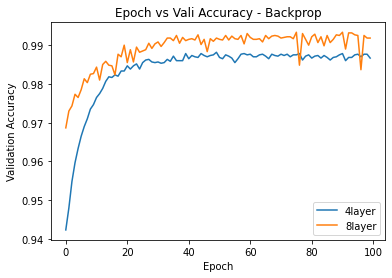

In [46]:
sns.lineplot(x = range(EPOCHS), y = logs['four_layer'].history['val_accuracy'], label = '4layer')
sns.lineplot(x = range(EPOCHS), y = logs['eight_layer'].history['val_accuracy'], label = '8layer')
# sns.lineplot(x = range(EPOCHS), y = logs['vgg16'].history['val_accuracy'], label = 'vgg16')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Epoch vs Vali Accuracy - Backprop')
plt.legend()
plt.show()
